<a href="https://colab.research.google.com/github/jananiarul1505/Naive_Bayes_Sentiment/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
positive_reviews = [
    'This product is excellent!',
    'I love this movie. It is fantastic!',
    'Absolutely wonderful experience.',
    'Highly recommend this place. The staff was amazing.',
    'The best purchase I\'ve made all year.',
    'So happy with the results. Truly superb!'
]

negative_reviews = [
    'This is a terrible service.',
    'I hate this restaurant. The food was awful.',
    'Extremely disappointed with the outcome.',
    'Would not recommend this product. It broke immediately.',
    'A complete waste of money and time.',
    'The worst experience I\'ve ever had.'
]

print("Positive Reviews created:")
for review in positive_reviews:
    print(f"- {review}")

print("\nNegative Reviews created:")
for review in negative_reviews:
    print(f"- {review}")

Positive Reviews created:
- This product is excellent!
- I love this movie. It is fantastic!
- Absolutely wonderful experience.
- Highly recommend this place. The staff was amazing.
- The best purchase I've made all year.
- So happy with the results. Truly superb!

Negative Reviews created:
- This is a terrible service.
- I hate this restaurant. The food was awful.
- Extremely disappointed with the outcome.
- Would not recommend this product. It broke immediately.
- A complete waste of money and time.
- The worst experience I've ever had.


In [14]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

all_reviews = positive_reviews + negative_reviews

labels = [1] * len(positive_reviews) + [0] * len(negative_reviews)

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(all_reviews)

print(f"Shape of feature matrix X: {X.shape}")

feature_names = vectorizer.get_feature_names_out()
print(f"Sample of feature names (first 10): {feature_names[:10]}")
print(f"Total number of features: {len(feature_names)}")

Shape of feature matrix X: (12, 52)
Sample of feature names (first 10): ['absolutely' 'all' 'amazing' 'and' 'awful' 'best' 'broke' 'complete'
 'disappointed' 'ever']
Total number of features: 52


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

model = MultinomialNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Performance:\n")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Model Performance:

Accuracy: 0.2500
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000


In [16]:
from sklearn.naive_bayes import BernoulliNB

bernoulli_model = BernoulliNB()

bernoulli_model.fit(X_train, y_train)

y_pred_bernoulli = bernoulli_model.predict(X_test)

accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)
precision_bernoulli = precision_score(y_test, y_pred_bernoulli)
recall_bernoulli = recall_score(y_test, y_pred_bernoulli)
f1_bernoulli = f1_score(y_test, y_pred_bernoulli)

print(f"Bernoulli Naive Bayes Model Performance:\n")
print(f"Accuracy: {accuracy_bernoulli:.4f}")
print(f"Precision: {precision_bernoulli:.4f}")
print(f"Recall: {recall_bernoulli:.4f}")
print(f"F1-Score: {f1_bernoulli:.4f}")

Bernoulli Naive Bayes Model Performance:

Accuracy: 0.2500
Precision: 0.2500
Recall: 1.0000
F1-Score: 0.4000


Performance DataFrame:
           Model     Metric  Score
0  MultinomialNB   Accuracy   0.25
1  MultinomialNB  Precision   0.00
2  MultinomialNB     Recall   0.00
3  MultinomialNB   F1-Score   0.00
4    BernoulliNB   Accuracy   0.25
5    BernoulliNB  Precision   0.25
6    BernoulliNB     Recall   1.00
7    BernoulliNB   F1-Score   0.40


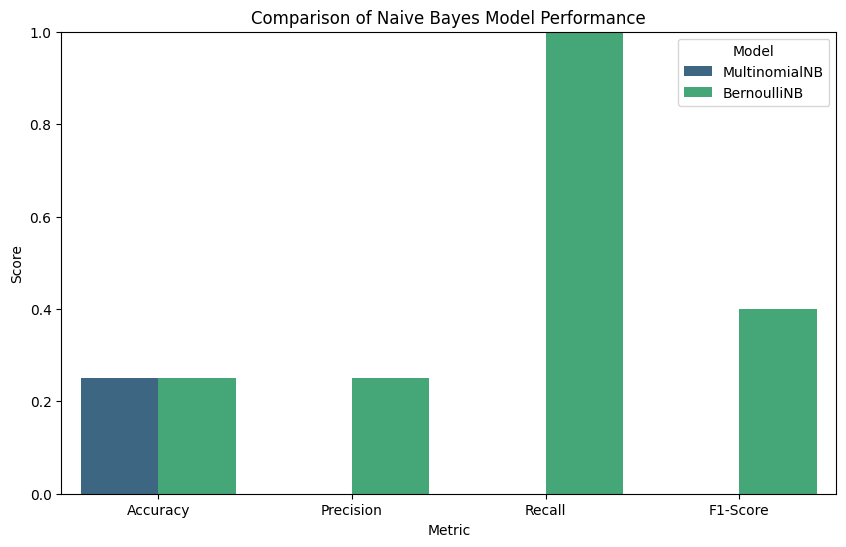

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

metrics_data = {
    'Model': ['MultinomialNB'] * 4 + ['BernoulliNB'] * 4,
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'] * 2,
    'Score': [
        accuracy, precision, recall, f1,
        accuracy_bernoulli, precision_bernoulli, recall_bernoulli, f1_bernoulli
    ]
}

performance_df = pd.DataFrame(metrics_data)

print("Performance DataFrame:")
print(performance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=performance_df, palette='viridis')

plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Comparison of Naive Bayes Model Performance')
plt.ylim(0, 1)

plt.show()

/tmp/ipython-input-687833544.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Word', data=mnb_neg_df, palette='Reds_d')


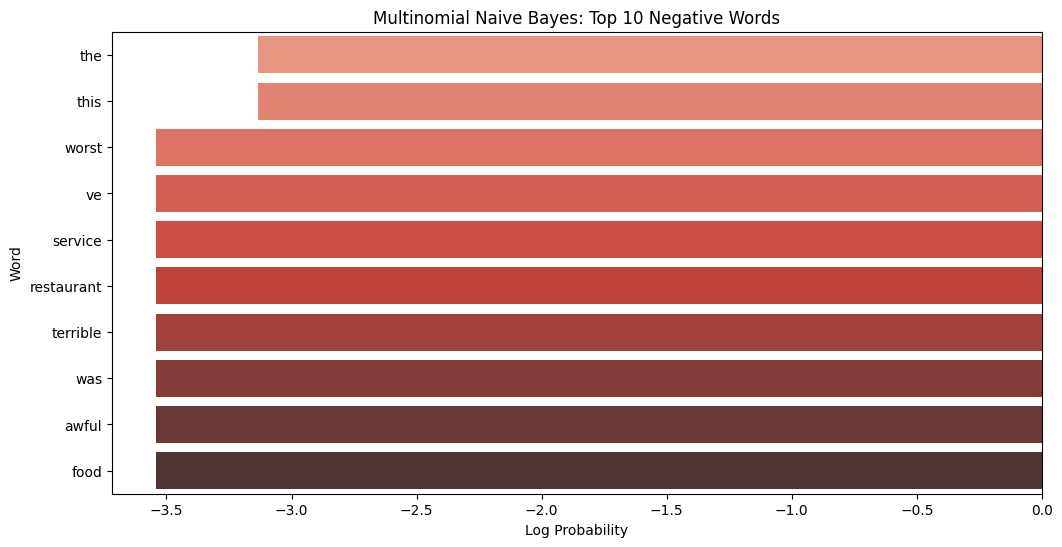

/tmp/ipython-input-687833544.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Word', data=mnb_pos_df, palette='Greens_d')


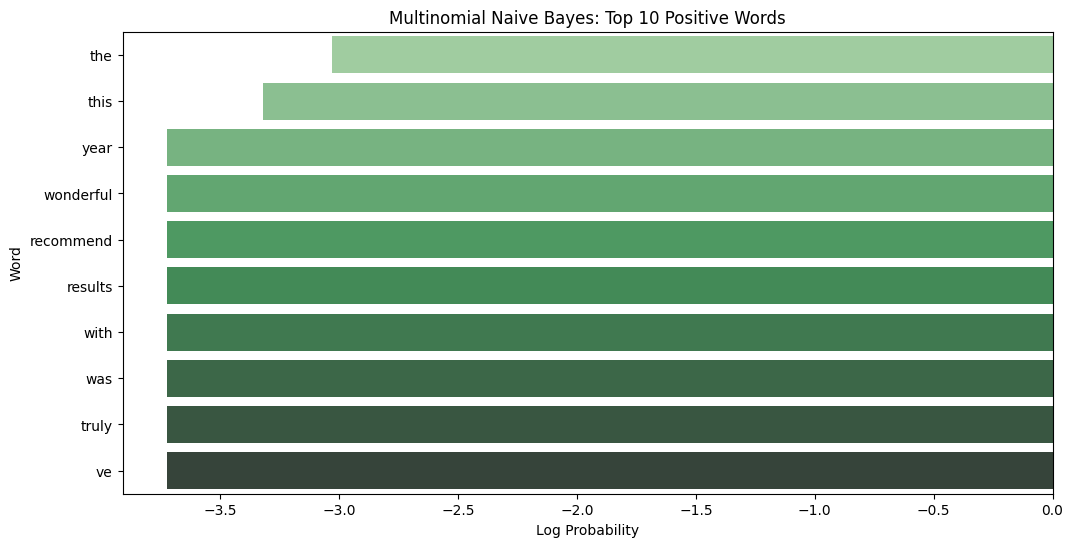

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = vectorizer.get_feature_names_out()
neg_class_prob_sorted_indices = model.feature_log_prob_[0].argsort()
pos_class_prob_sorted_indices = model.feature_log_prob_[1].argsort()

mnb_neg_words = []
for index in neg_class_prob_sorted_indices[::-1][:10]:
    mnb_neg_words.append({'Word': feature_names[index], 'Score': model.feature_log_prob_[0][index], 'Sentiment': 'Negative'})
mnb_neg_df = pd.DataFrame(mnb_neg_words)

mnb_pos_words = []
for index in pos_class_prob_sorted_indices[::-1][:10]:
    mnb_pos_words.append({'Word': feature_names[index], 'Score': model.feature_log_prob_[1][index], 'Sentiment': 'Positive'})
mnb_pos_df = pd.DataFrame(mnb_pos_words)

plt.figure(figsize=(12, 6))
sns.barplot(x='Score', y='Word', data=mnb_neg_df, palette='Reds_d')
plt.title('Multinomial Naive Bayes: Top 10 Negative Words')
plt.xlabel('Log Probability')
plt.ylabel('Word')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Score', y='Word', data=mnb_pos_df, palette='Greens_d')
plt.title('Multinomial Naive Bayes: Top 10 Positive Words')
plt.xlabel('Log Probability')
plt.ylabel('Word')
plt.show()


/tmp/ipython-input-1953973427.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Word', data=bnb_neg_df, palette='Reds_d')


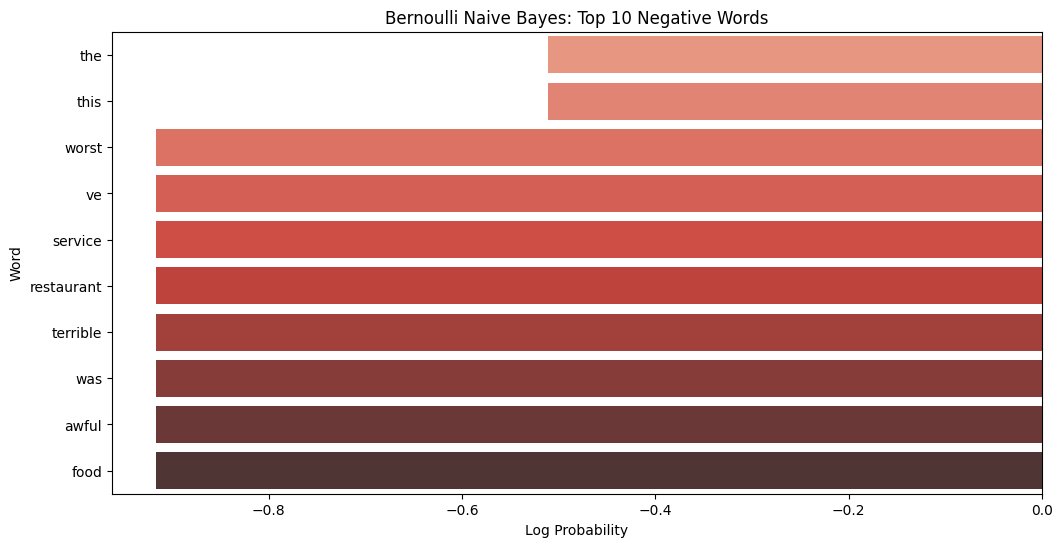

/tmp/ipython-input-1953973427.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Word', data=bnb_pos_df, palette='Greens_d')


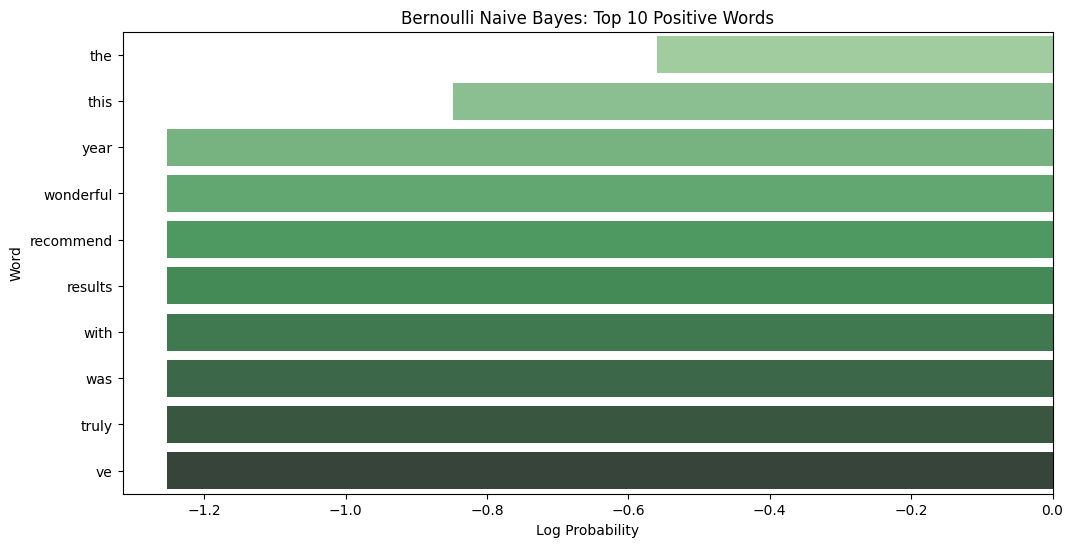

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = vectorizer.get_feature_names_out()
neg_class_prob_sorted_indices_bern = bernoulli_model.feature_log_prob_[0].argsort()
pos_class_prob_sorted_indices_bern = bernoulli_model.feature_log_prob_[1].argsort()

bnb_neg_words = []
for index in neg_class_prob_sorted_indices_bern[::-1][:10]:
    bnb_neg_words.append({'Word': feature_names[index], 'Score': bernoulli_model.feature_log_prob_[0][index], 'Sentiment': 'Negative'})
bnb_neg_df = pd.DataFrame(bnb_neg_words)

bnb_pos_words = []
for index in pos_class_prob_sorted_indices_bern[::-1][:10]:
    bnb_pos_words.append({'Word': feature_names[index], 'Score': bernoulli_model.feature_log_prob_[1][index], 'Sentiment': 'Positive'})
bnb_pos_df = pd.DataFrame(bnb_pos_words)

plt.figure(figsize=(12, 6))
sns.barplot(x='Score', y='Word', data=bnb_neg_df, palette='Reds_d')
plt.title('Bernoulli Naive Bayes: Top 10 Negative Words')
plt.xlabel('Log Probability')
plt.ylabel('Word')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Score', y='Word', data=bnb_pos_df, palette='Greens_d')
plt.title('Bernoulli Naive Bayes: Top 10 Positive Words')
plt.xlabel('Log Probability')
plt.ylabel('Word')
plt.show()
